<a href="https://colab.research.google.com/github/GiliardGodoi/learning/blob/main/PyTorch/00_quickstart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Quickstart

Referências:
1. <https://pytorch.org/tutorials/beginner/basics/quickstart_tutorial.html>
2. <https://pytorch.org/tutorials/beginner/basics/data_tutorial.html>

In [4]:
from matplotlib import pyplot as plt

In [2]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

In [3]:
training_data = datasets.FashionMNIST(
    root='data',
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root='data',
    train=False,
    download=True,
    transform=ToTensor()
)

100%|██████████| 26421880/26421880 [00:03<00:00, 8382467.22it/s] 


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 146588.34it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 2732048.98it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 9503643.04it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



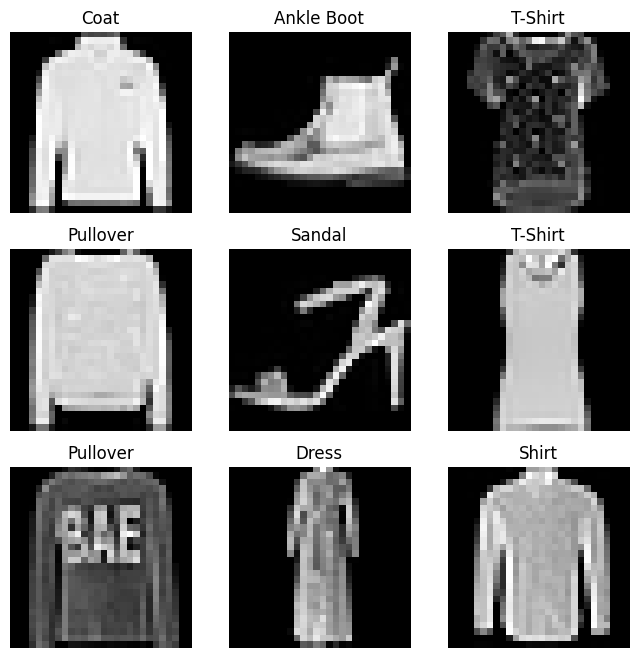

In [6]:
label_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

fig = plt.figure(figsize=(8, 8))
cols, rows = 3, 3

for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]

    fig.add_subplot(rows, cols, i)
    plt.title(label_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")


In [7]:
batch_size = 64

train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

for X, y in test_dataloader:
    print(f"Shape of X [N, C, H, W] : {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break

Shape of X [N, C, H, W] : torch.Size([64, 1, 28, 28])
Shape of y: torch.Size([64]) torch.int64


In [8]:
device = (
    'cuda'
    if torch.cuda.is_available()
    else 'mps'
    if torch.backends.mps.is_available()
    else 'cpu'
)

device

'cuda'

In [9]:
class NeuralNetwork(nn.Module):

    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28 * 28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)

        return logits

In [10]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # compute predictions error
        predictions = model(X)
        loss = loss_fn(predictions, y)

        # backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X) * len(X[0])
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

In [11]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)

    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            predictions = model(X)
            test_loss += loss_fn(predictions, y).item()
            correct += (predictions.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100 * correct):>0.1f}%, Avg loss: {test_loss:>8f}\n")

In [13]:
model = NeuralNetwork().to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

epochs = 10

for t in range(epochs):
    print(f"Epoch {t + 1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)

print("Done!")

Epoch 1
-------------------------------
loss: 2.297913  [    0/60000]
loss: 2.281031  [ 6400/60000]
loss: 2.256519  [12800/60000]
loss: 2.255820  [19200/60000]
loss: 2.235953  [25600/60000]
loss: 2.222473  [32000/60000]
loss: 2.220469  [38400/60000]
loss: 2.196403  [44800/60000]
loss: 2.191254  [51200/60000]
loss: 2.148929  [57600/60000]
Test Error: 
 Accuracy: 50.4%, Avg loss: 2.147611

Epoch 2
-------------------------------
loss: 2.164251  [    0/60000]
loss: 2.150733  [ 6400/60000]
loss: 2.095883  [12800/60000]
loss: 2.101682  [19200/60000]
loss: 2.051469  [25600/60000]
loss: 2.009947  [32000/60000]
loss: 2.014291  [38400/60000]
loss: 1.958027  [44800/60000]
loss: 1.951885  [51200/60000]
loss: 1.857735  [57600/60000]
Test Error: 
 Accuracy: 58.2%, Avg loss: 1.874761

Epoch 3
-------------------------------
loss: 1.915118  [    0/60000]
loss: 1.883640  [ 6400/60000]
loss: 1.778267  [12800/60000]
loss: 1.789006  [19200/60000]
loss: 1.693767  [25600/60000]
loss: 1.659314  [32000/60000

In [14]:
torch.save(model.state_dict(), 'model.pth')

In [15]:
model2 = NeuralNetwork().to(device)
model2.load_state_dict(torch.load('model.pth'))

<All keys matched successfully>

In [20]:
classes = [v for v in label_map.values() ]
print(classes)

['T-Shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']


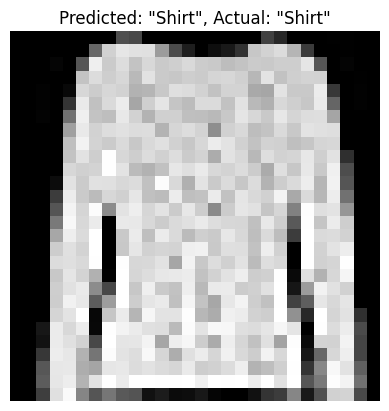

In [25]:
index = 89 # @param {type : 'number'}

model2.eval()
x, y = test_data[index][0], test_data[index][1]
with torch.no_grad():
    x = x.to(device)
    pred = model2(x)
    predicted, actual = classes[pred[0].argmax(0)], classes[y]

    plt.title(f'Predicted: "{predicted}", Actual: "{actual}"')
    plt.imshow(x.cpu().squeeze(), cmap='gray')
    plt.axis('off')